# Preparing before training 

### Import first libaries

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Load penguins dataset and explore data

In [61]:
penguins = sns.load_dataset('penguins')

In [62]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**Before start, I have a picture to visualize species of penguin to help you know it in real life look like:**

![Alt text](https://imgur.com/orZWHly.png)

**And here is the picture provides a labeled diagram of a penguin**

![Alt text](https://img.freepik.com/free-vector/diagram-showing-parts-penguin_1308-31210.jpg)

*I hope that picture will help you understand what data is for*


In [63]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [64]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Define mising data

In [65]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [66]:
penguins[penguins.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


## Handle missing data

### Fill mising data with method of mean

In [67]:
# With data of columns are number, I use method mean for them
for column in ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']:
    penguins[column].fillna(value = penguins[column].mean(), inplace= True)
penguins.isnull().sum()

C:\Users\hieut\AppData\Local\Temp\ipykernel_21016\1185513367.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins[column].fillna(value = penguins[column].mean(), inplace= True)


species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

### Fill mising data with most frequently data

In [68]:
# With the categorical datas, I will use mode method
penguins['sex'].fillna(value=penguins['sex'].mode()[0], inplace= True)
penguins.isnull().sum()

C:\Users\hieut\AppData\Local\Temp\ipykernel_21016\1266463209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins['sex'].fillna(value=penguins['sex'].mode()[0], inplace= True)


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [69]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


### Nhận xét về cách xử lý mising data 

- Đầu tiên, ta kiểm tra dữ liệu bị thiếu hụt trong bộ dữ liệu penguins.
- Đối với các cột số ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g') là kiểu numerical, nên ta điền giá trị trung bình (mean) của từng cột.
- Đối với cột phân loại ('sex') là kiểu categorical, nên ta điền giá trị phổ biến nhất (mode).
- Sau khi điền giá trị, ta kiểm tra lại dữ liệu để đảm bảo không còn giá trị bị thiếu hụt.
- Việc điền giá trị trung bình giúp giữ lại các mẫu dữ liệu mà không làm sai lệch phân phối của dữ liệu số.
- Việc điền giá trị phổ biến nhất cho cột phân loại giúp giữ lại các mẫu dữ liệu mà không làm sai lệch phân phối của dữ liệu phân loại.

# Visualize data on charts

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

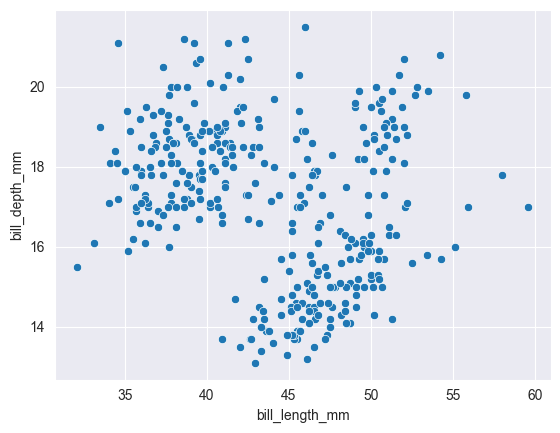

In [70]:
sns.set_style('darkgrid')
sns.scatterplot(data=penguins,x='bill_length_mm',y= 'bill_depth_mm')

In [71]:
palette={'Adelie':'red','Chinstrap':'blue','Gentoo':'purple'}

In [72]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

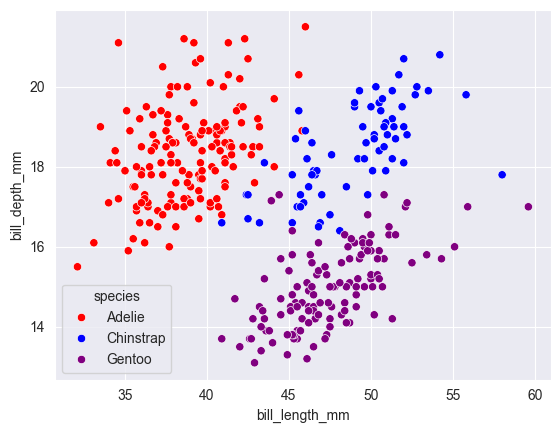

In [73]:
sns.scatterplot(data=penguins,x='bill_length_mm',y= 'bill_depth_mm', hue='species',palette=palette)

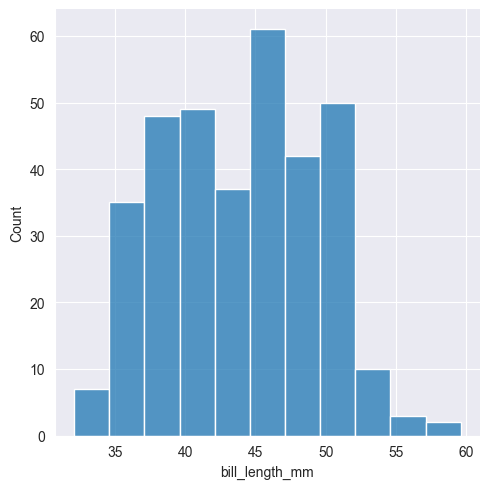

In [74]:
sns.displot(data=penguins,x='bill_length_mm')

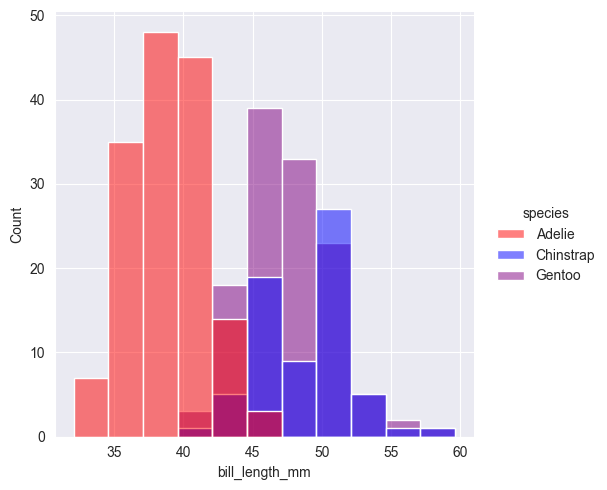

In [75]:
sns.displot(data=penguins,x='bill_length_mm',hue='species',palette=palette)

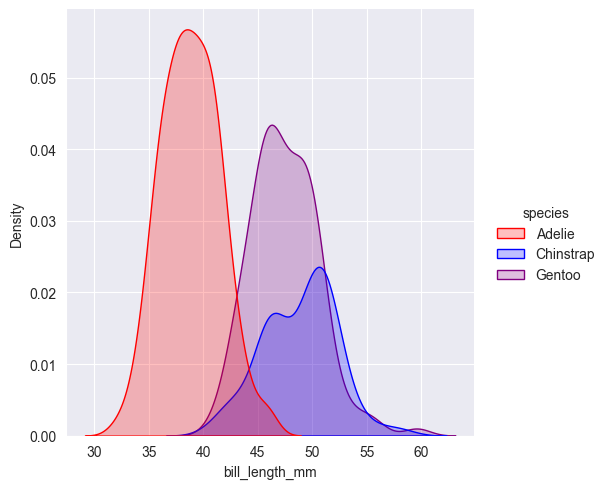

In [76]:
sns.displot(data=penguins,x='bill_length_mm',kind='kde',hue='species',palette=palette,fill=True)

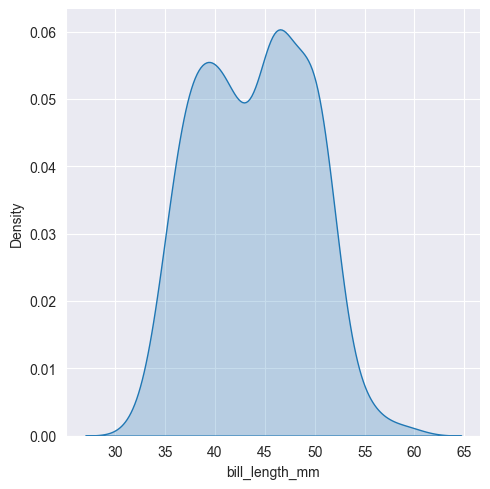

In [77]:
sns.displot(data=penguins,x='bill_length_mm',kind='kde',fill=True)

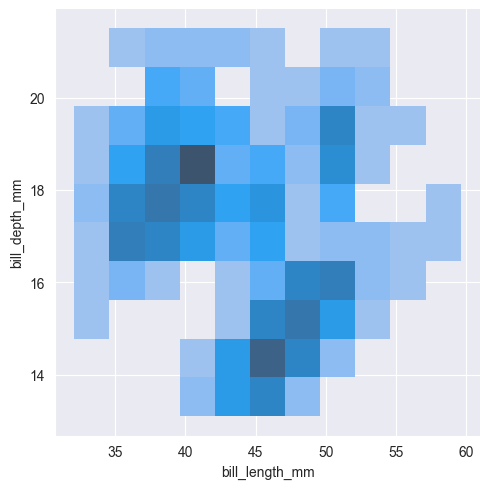

In [78]:
sns.displot(data=penguins,x='bill_length_mm',y='bill_depth_mm')

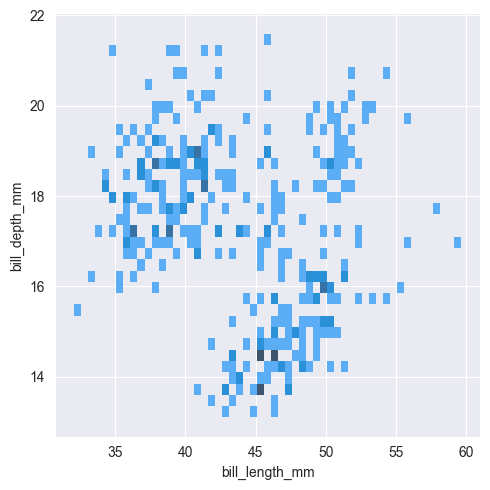

In [79]:
sns.displot(data=penguins,x='bill_length_mm',y='bill_depth_mm',binwidth=(0.5,0.25))

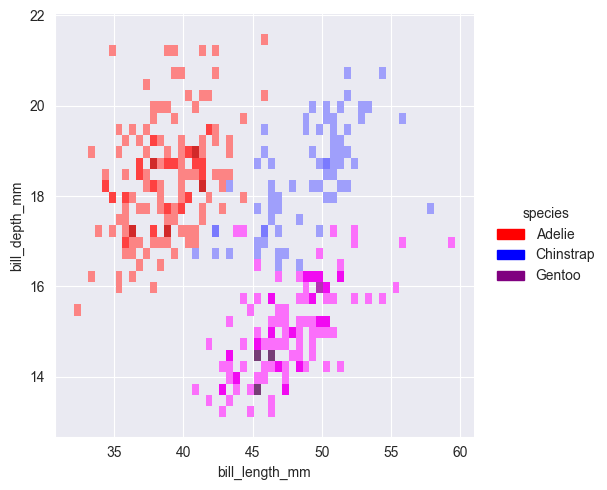

In [80]:
sns.displot(data=penguins,x='bill_length_mm',y='bill_depth_mm',binwidth=(0.5,0.25),hue='species',palette=palette)

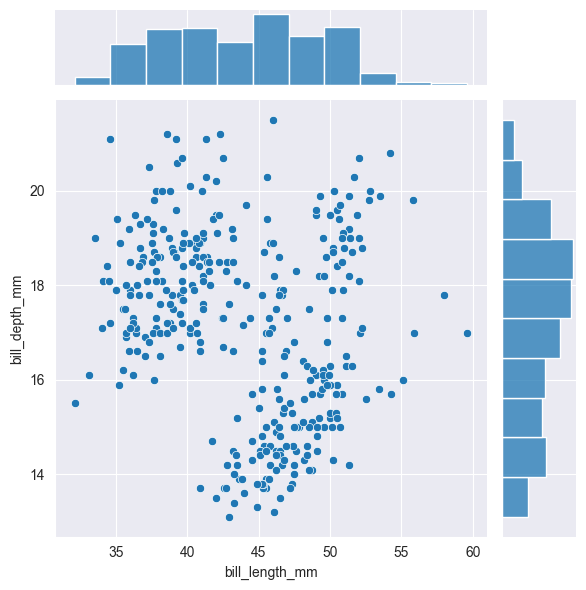

In [81]:
sns.jointplot(data=penguins,x='bill_length_mm',y='bill_depth_mm')

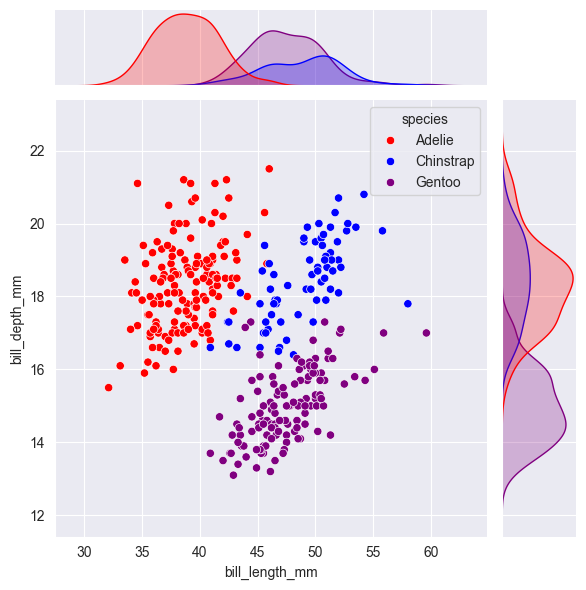

In [82]:
sns.jointplot(data=penguins,x='bill_length_mm',y='bill_depth_mm',hue='species',palette=palette)

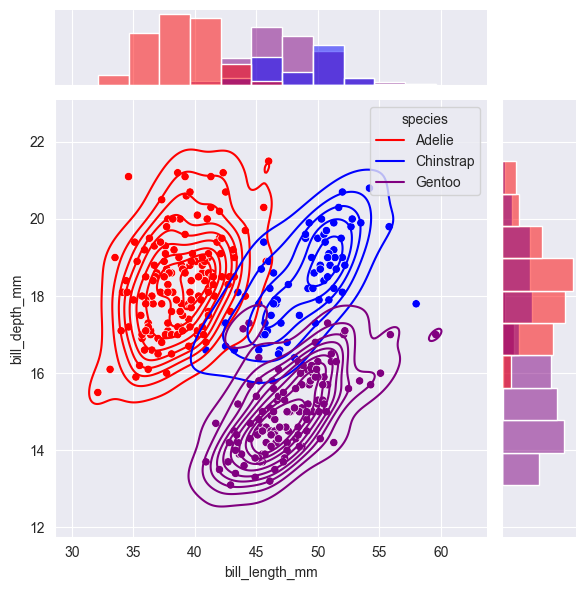

In [83]:
g = sns.jointplot(data=penguins,x='bill_length_mm',y='bill_depth_mm',hue='species',palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

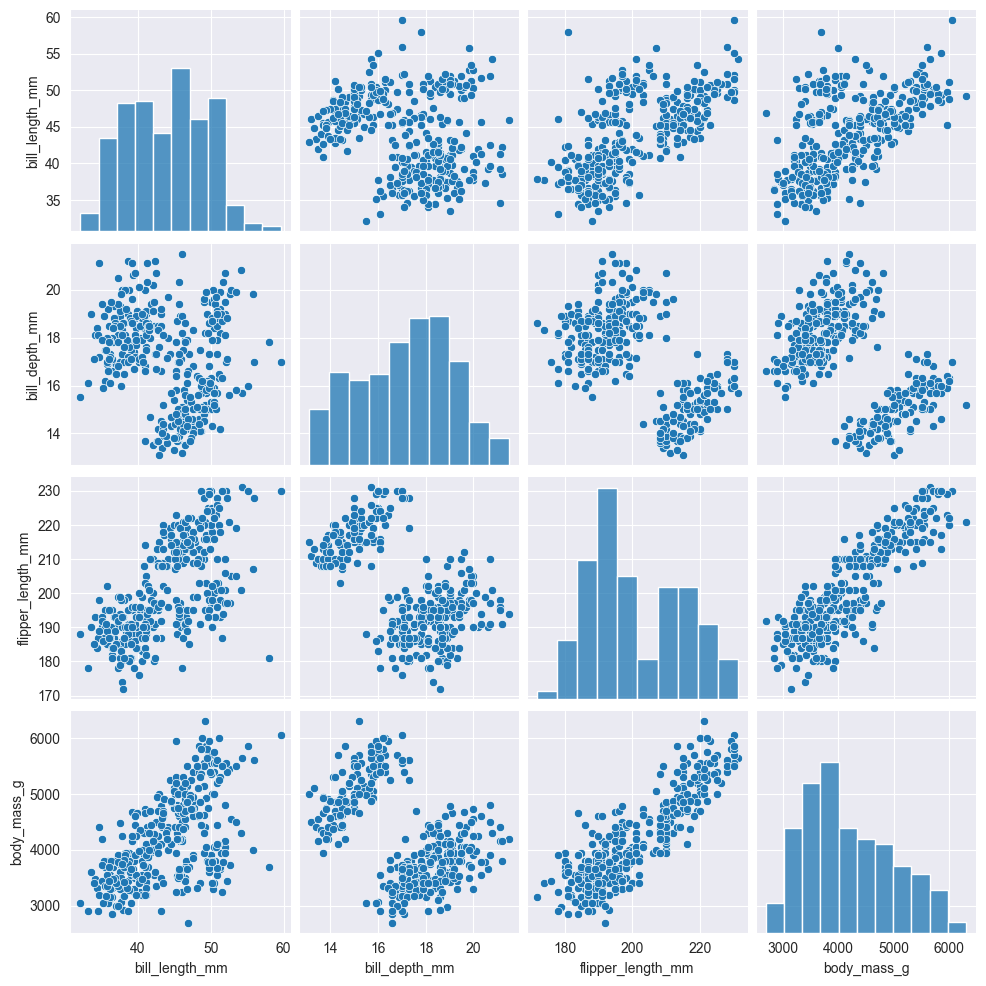

In [84]:
sns.pairplot(data=penguins)

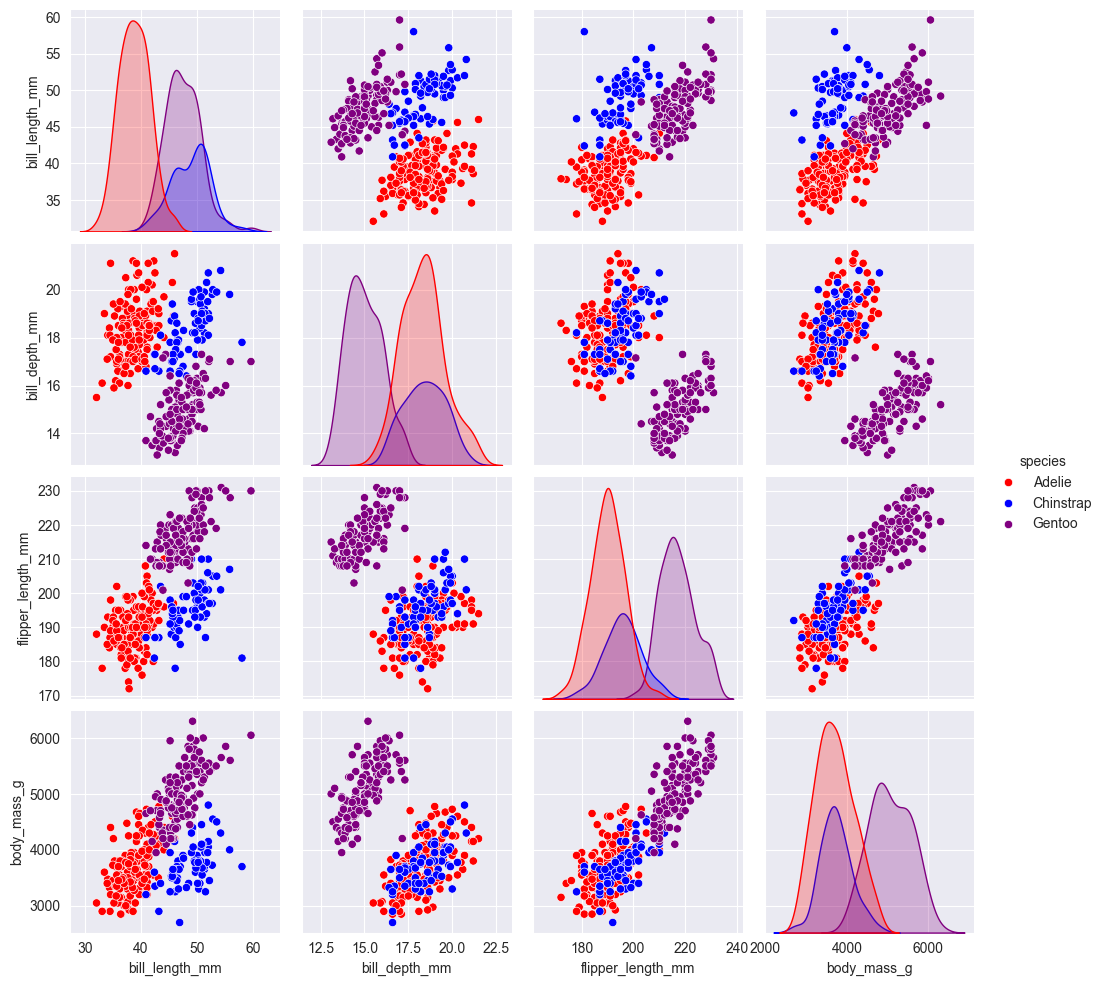

In [85]:
sns.pairplot(data=penguins,hue='species',palette=palette)
plt.savefig('penguins.pdf')

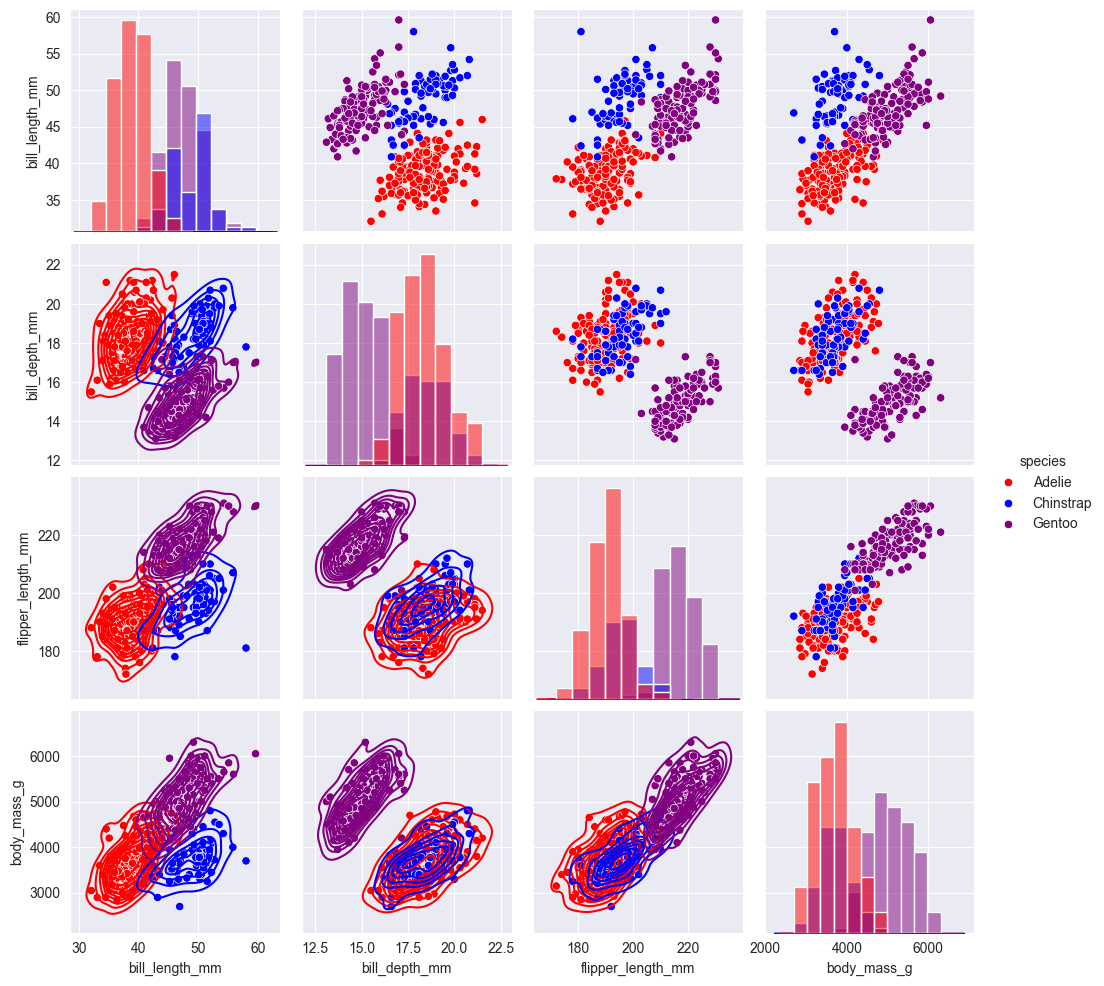

In [86]:
g = sns.pairplot(data=penguins,hue='species',palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

<Axes: xlabel='species', ylabel='bill_length_mm'>

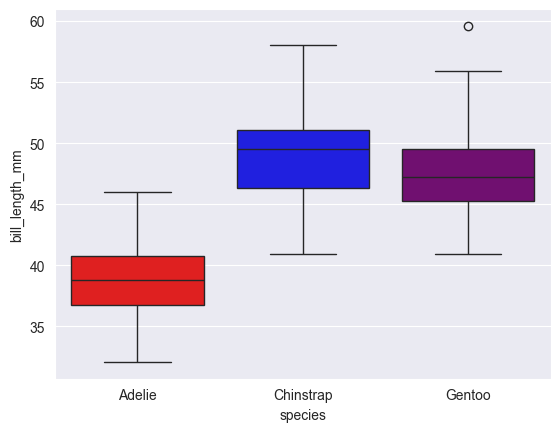

In [87]:
sns.boxplot(data=penguins,x='species',y='bill_length_mm',hue='species',palette=palette)

<Axes: xlabel='species', ylabel='count'>

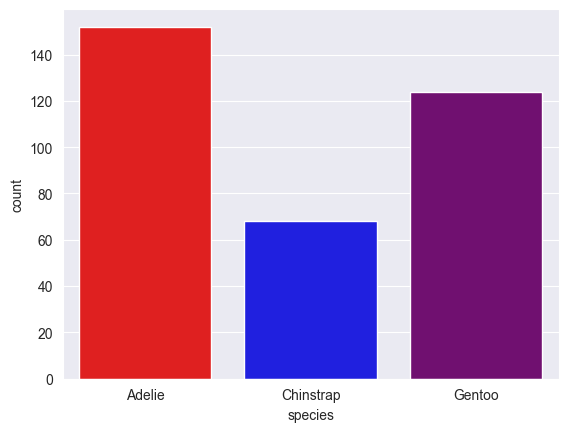

In [88]:
sns.countplot(data=penguins,x='species',hue='species',palette=palette)

<Axes: xlabel='island', ylabel='count'>

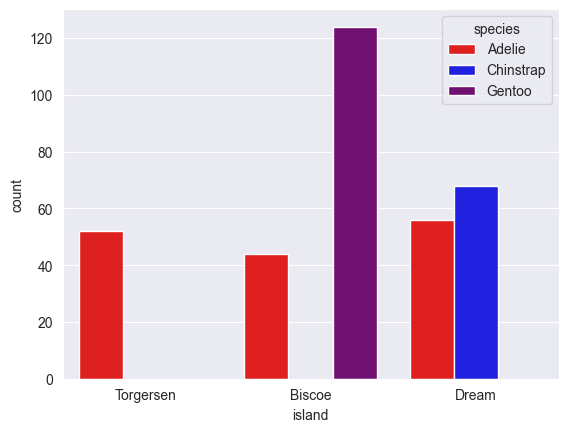

In [89]:
sns.countplot(data=penguins,x='island',hue='species',palette=palette)

<Axes: >

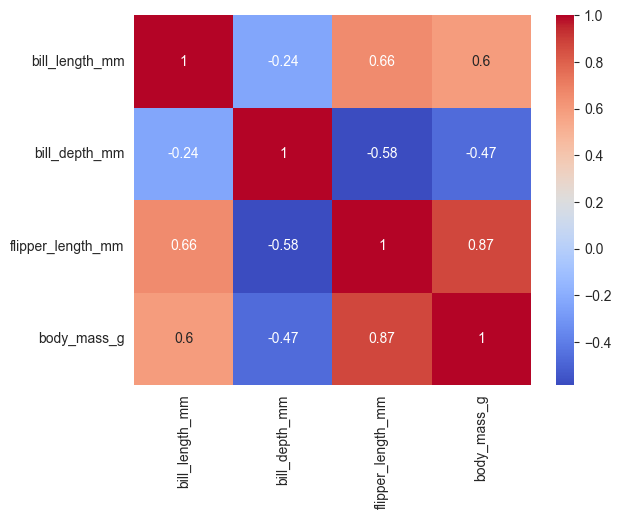

In [90]:
sns.heatmap(data=penguins[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].corr(), annot=True, cmap='coolwarm')

C:\Users\hieut\AppData\Local\Temp\ipykernel_21016\3532983114.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="species",y="bill_length_mm",data=penguins,palette=palette)


<Axes: xlabel='species', ylabel='bill_length_mm'>

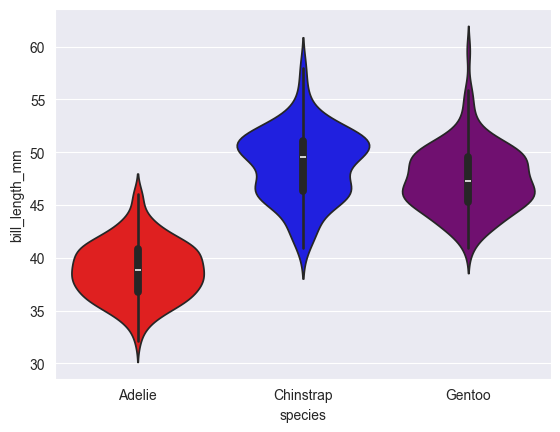

In [95]:
sns.violinplot(x="species",y="bill_length_mm",data=penguins,palette=palette)

# Use model to solve problem

## Preparing data to be used in a model

### Import libaries

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Init the LabelEncoder
encoder = LabelEncoder()

### Convert data of island and sex column

#### Convert data of sex column

In [34]:
penguins.groupby('sex').size()

sex
Female    165
Male      179
dtype: int64

In [35]:
penguins['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
# I use encoder to transform Male = 1 and Female = 0
penguins['sex']=encoder.fit_transform(penguins['sex'])
penguins['sex'].unique()

array([1, 0])

In [37]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,1
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,0
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,1
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,0


#### Convert data of island column

In [38]:
penguins.groupby('island').size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

In [39]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [40]:
# Trans Torgersen = 2, Biscoe = 0 and Dream = 1
penguins['island']=encoder.fit_transform(penguins['island'])
penguins['island'].unique()

array([2, 0, 1])

In [41]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,2,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,2,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,2,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,Gentoo,0,43.92193,17.15117,200.915205,4201.754386,1
340,Gentoo,0,46.80000,14.30000,215.000000,4850.000000,0
341,Gentoo,0,50.40000,15.70000,222.000000,5750.000000,1
342,Gentoo,0,45.20000,14.80000,212.000000,5200.000000,0


### Preparing data for training and test

In [42]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [43]:
X = penguins[['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins[['species']]
# Encode species into int data to train
y = encoder.fit_transform(y)
# Split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23521672)

c:\Users\hieut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Use Decision Tree model to classificate

#### Create a decision tree with max_depth =2

In [44]:
penguins_features= ['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']
DTmodel=DecisionTreeClassifier(max_depth=2,random_state=23521672)
DTmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=23521672)

#### Visualize the tree

##### Import libraries

In [45]:
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

##### Visualize 

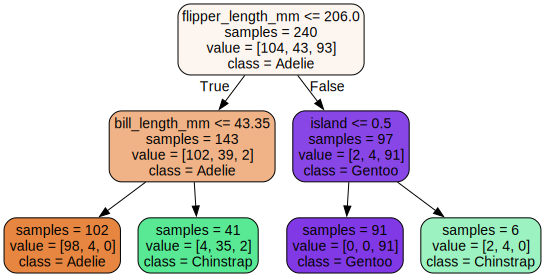

In [46]:
export_graphviz(DTmodel,out_file='penguins.dot',feature_names=penguins_features,class_names=encoder.classes_,impurity=False, filled=True,rounded=True)
Source.from_file('penguins.dot')

##### Predict and rate

In [47]:
y_predicted=DTmodel.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted)
accuracy

0.9807692307692307

#### Retrain with another max depth and compare

##### Max depth =4

In [48]:
DTmodel=DecisionTreeClassifier(max_depth=4,random_state=23521672)
DTmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=23521672)

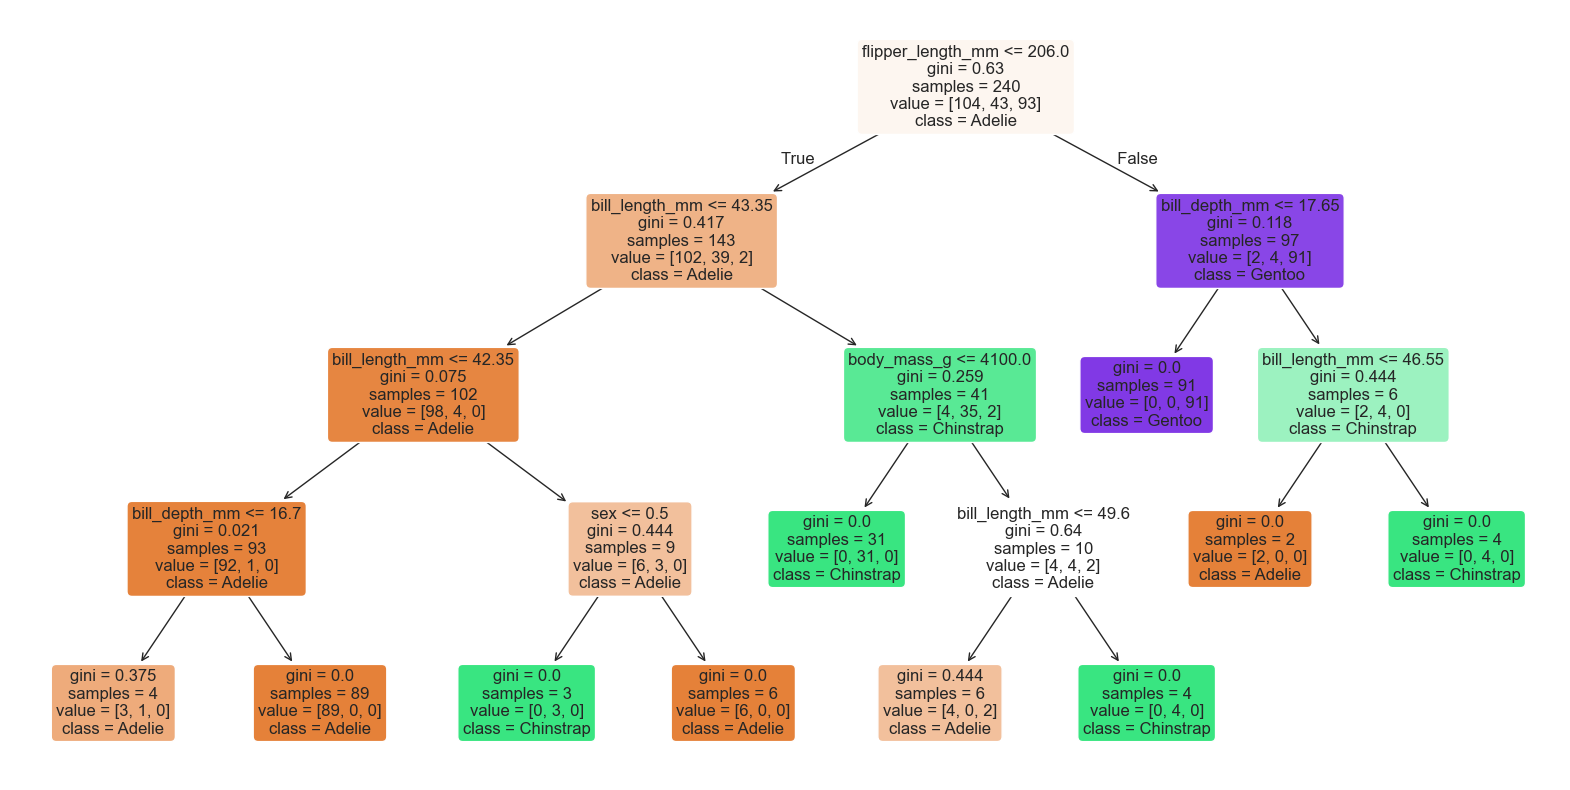

In [49]:
plt.figure(figsize=(20,10))
plot_tree(DTmodel,feature_names=penguins_features,class_names=encoder.classes_, filled=True,rounded=True,fontsize=12)
plt.show()

In [50]:
y_predicted=DTmodel.predict(X_test)
accuracy=accuracy_score(y_test,y_predicted)
accuracy

0.9807692307692307

##### Max depth =10

In [51]:
DTmodel=DecisionTreeClassifier(max_depth=10,random_state=23521672)
DTmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=23521672)

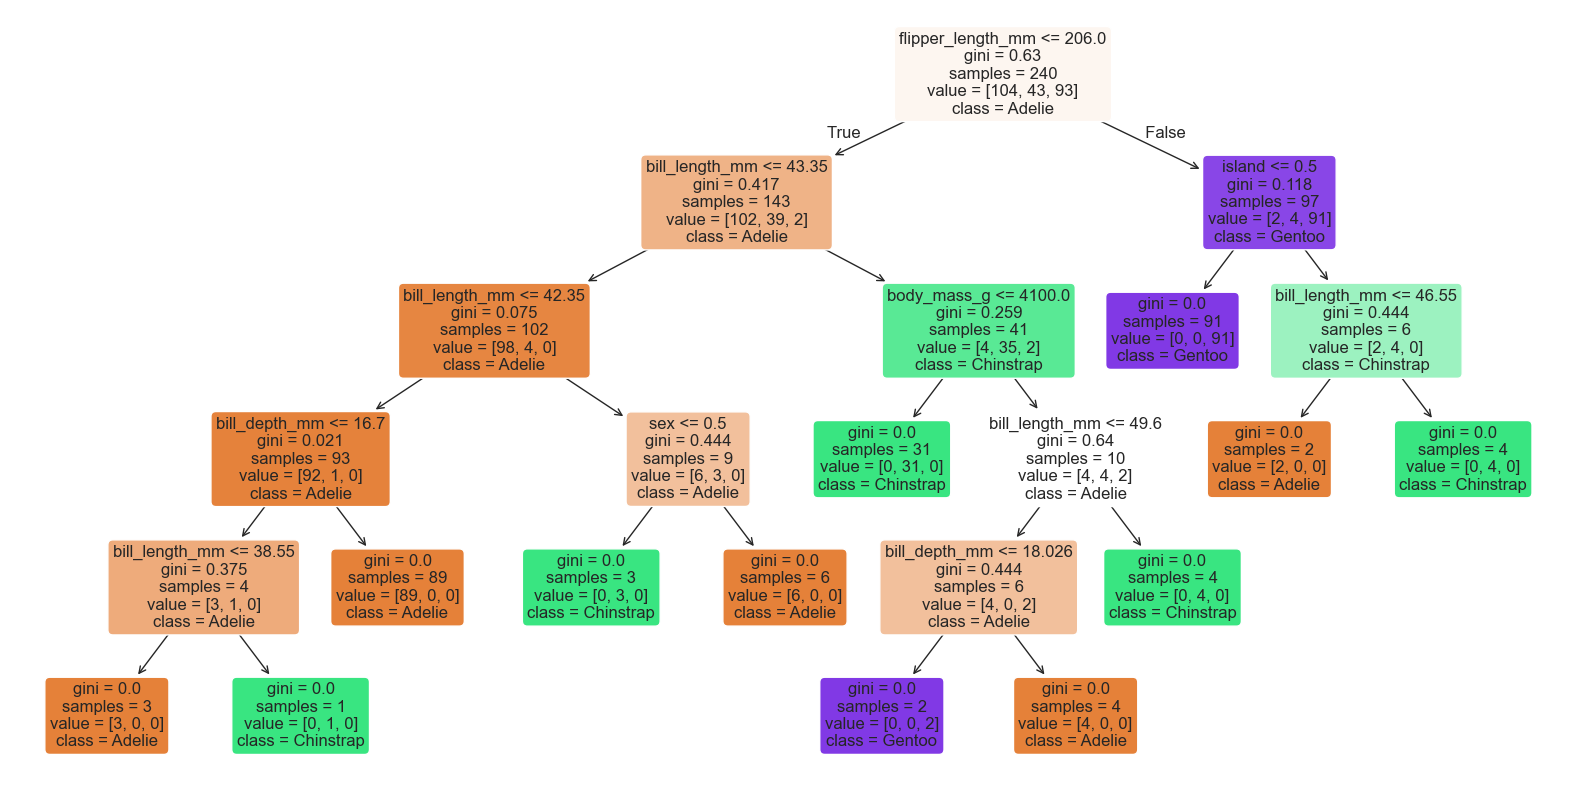

In [52]:
plt.figure(figsize=(20,10))
plot_tree(DTmodel,feature_names=penguins_features,class_names=encoder.classes_, filled=True,rounded=True,fontsize=12)
plt.show()

In [53]:
y_predicted=DTmodel.predict(X_test)
accuracy=accuracy_score(y_test,y_predicted)
accuracy

0.9711538461538461

##### Using Grid Search with Cross-Validation to find best max_depth

In [54]:
#Import Libary
from sklearn.model_selection import GridSearchCV
#Select the range of max_depth want to try
param_grid = {'max_depth':range(1,11)}
#Use GridSearchCV to optimized max_depth
grid_search = GridSearchCV(DTmodel, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10,
                                              random_state=23521672),
             param_grid={'max_depth': range(1, 11)}, scoring='accuracy')

In [55]:
# Print best max_depth and best accuracy
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best max_depth: 5
Best cross-validation accuracy: 0.9583333333333334


In [56]:
# Testing best max_depth on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.9711538461538461


**Note: Grid Search with Cross-validation is used for find best max_depth in train data. So it maybe not a best choice for choose the max_depth which have best accurary score in test data, but it's helpful when to choose suitable max_depth.**

#### Nhận xét về hyperparamete max_depth

- Sau khi thử nghiệm các giá trị khác nhau của max_depth (2,4,10), ta có một số nhận xét sau:
    - Khi max_depth nhỏ (ví dụ: 1), mô hình có thể bị underfitting, dẫn đến độ chính xác thấp.
    - Khi max_depth tăng lên, độ chính xác trên tập test cũng tăng lên, cho thấy mô hình học được nhiều mẫu hơn từ dữ liệu.
    - Tuy nhiên, khi max_depth quá lớn (ví dụ: 9, 10), mô hình có thể bị overfitting, dẫn đến độ chính xác trên tập test không cải thiện hoặc thậm chí giảm.
    - max_depth tối ưu cho dữ liệu này có thể là 2, nơi độ chính xác trên tập test đạt giá trị cao nhất.
- Từ đó ta kết luận được một số vai trò của hyperparametes của max_depth khi chọn thích hợp:
    - Cải thiện hiệu suất của mô hình
    - Giảm thời gian huấn luyện
    - Giúp mô hình phù hợp hơn với bài toán cụ thể <br>
    
*Note:*<br>
*- Underfitting: xảy ra khi mô hình quá đơn giản để nắm bắt các mẫu từ dữ liệu huấn luyện. Điều này dẫn đến hiệu suất kém trên cả dữ liệu huấn luyện và dữ liệu kiểm tra.*<br>
*- Overfitting: xảy ra khi mô hình quá phức tạp và học quá chi tiết từ dữ liệu huấn luyện, bao gồm cả nhiễu (noise). Điều này dẫn đến hiệu suất rất tốt trên dữ liệu huấn luyện nhưng kém trên dữ liệu kiểm tra.*

### Use another model and compare

#### KNN Model

In [57]:
# Import libary
from sklearn.neighbors import KNeighborsClassifier
# Ceate KNN model with n_neighbors =5
Kmodel = KNeighborsClassifier(n_neighbors=5)
# Train KNN model with train data
Kmodel.fit(X_train,y_train)
# Use KNN model to predict
K_pred = Kmodel.predict(X_test)
#accuracy score
print("The Accuracy of KNN model is", accuracy_score(K_pred, y_test))

The Accuracy of KNN model is 0.7403846153846154


#### SVM model

In [58]:
# Impore libary
from sklearn import svm
# Create SVM model through SVC class
SVCmodel = svm.SVC()
# Train SVM model with train data
SVCmodel.fit(X_train,y_train)
# Use SVM model to predict
SVC_pred = SVCmodel.predict(X_test)
#accuracy score
print("The Accuracy of SVM model is", accuracy_score(SVC_pred, y_test))

The Accuracy of SVM model is 0.6730769230769231


#### Nhận xét về việc sử dụng model

**Thông qua việc sử dụng một số model phổ biến, ta rút ra một số ưu và nhược điểm của Decision Tree như sau:**
* Ưu điểm: 
    - Xử lý dữ liệu không tuyến tính: Decision Tree có khả năng xử lý dữ liệu không tuyến tính và các mối quan hệ phức tạp giữa các biến đầu vào.
    - Giải thích dễ dàng: Decision Tree dễ dàng giải thích và trực quan hóa, giúp hiểu rõ cách mô hình đưa ra quyết định.
    - Không cần chuẩn hóa dữ liệu: Decision Tree không yêu cầu chuẩn hóa hoặc chuẩn hóa dữ liệu, điều này có thể giúp tiết kiệm thời gian tiền xử lý.
* Nhược điểm:
    - Dễ bị overfitting và underfitting: Decision Tree có thể dễ dàng bị overfitting hoặc underfitting nếu không được cắt tỉa (pruning) đúng cách.
    
*Lưu ý: do cả 2 model là KNN và SVM đều yêu cầu chuẩn hóa dữ liệu và hiệu suất kém với dữ liệu lớn nên hoạt động không hiệu quả bằng Decision Tree*

**Từ đó ta rút ra một số kinh nghiệm về dùng model để xử lý bài toán:**
- Hiểu rõ dữ liệu bài toán
- Xử lý dữ liệu trước khi training đúng cách
- Thử nghiệm nhiều mô hình phù hợp với yêu cầu và dữ liệu bài toán 
- Đánh giá hiệu suất của chúng
- Chọn mô hình tốt nhất để giải quyết